In [3]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from matplotlib import colors

In [4]:
#name,density,conductivity,capacity,color
materials = [
    ['air',1.2,0.0259,1007,[0.,0.,0.,0.]],
    ['D300',300,0.08,840,'gray'],
    ['sand',1680,0.33,800,'yellow'],
    ['EPPS',100,0.03,1260,'blue'],
    ['mWool',100,0.045,800,'lightgrey']
]

In [5]:
MAX_X = 4.2
MAX_Y = 4.2
dx = 0.01

NX = int(MAX_X/dx)+1
NY = int(MAX_Y/dx)+1

space = np.zeros((NY,NX),dtype=int)

In [6]:
for x in range(0,NX):
    cx = x - NX/2
    for y in range(0,NY):
        cy = y - NY/2
        
        if cx*cx + cy*cy < 3.8/dx/dx:
            space[x,y] = 2
        elif cx*cx + cy*cy < 4/dx/dx:
            space[x,y] = 4


In [7]:
#%matplotlib notebook
%matplotlib inline

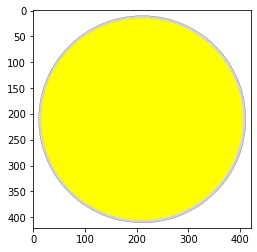

In [8]:
fig = plt.figure()
Space_image = np.zeros((NY,NX,4))

for i in range(1,len(materials)):
    Space_image += (space==i)[:,:,np.newaxis]*colors.to_rgba(materials[i][4])
    

imgplot = plt.imshow(Space_image)

In [9]:
T_min = -15
T_max = 500
T = np.zeros((NY,NX))

def setTempLimits():
    global T
    T = (space==0)*-15 + (space!=0)*T

def zeroTemp():
    global T
    T[:] = 0
    T = (space==2)*500 + (space!=2)*T
    setTempLimits()


zeroTemp()

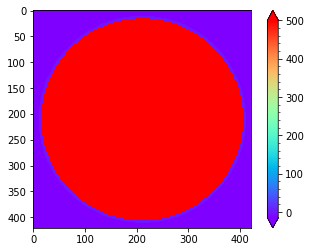

In [10]:
def drawTemp():
    global T_min
    global T_max
    
    fig = plt.figure()
    ax = plt.axes()
    
    imgplot = plt.imshow(T,cmap='rainbow',vmin=T_min,vmax=T_max, interpolation='none')
    cbar = fig.colorbar(imgplot, ax=ax, extend='both')
    cbar.minorticks_on()
    plt.show()

drawTemp()

In [11]:
dt=0.5

Q = np.zeros((NY,NX))
S = np.zeros((NY,NX))

for i in range(0,len(materials)):
    m = materials[i]
    q = m[1]*m[3]*dx**2
    s = dt*m[2]
    print(f'material={m[0]} q={q}J s={s}J s/q={s/q}')
    Q= (space==i)*q + (space!=i)*Q
    S= (space==i)*s + (space!=i)*S
    
Qc = Q[1:-1,1:-1]

Sc = S[1:-1,1:-1]
Sl = S[1:-1,0:-2]
Sr = S[1:-1,2:]
Su = S[0:-2,1:-1]
Sd = S[2:,1:-1]

Kl = (Sl+Sc)/2/Qc
Kr = (Sr+Sc)/2/Qc
Ku = (Su+Sc)/2/Qc
Kd = (Sd+Sc)/2/Qc

material=air q=0.12083999999999999J s=0.01295J s/q=0.10716650115855678
material=D300 q=25.200000000000003J s=0.04J s/q=0.001587301587301587
material=sand q=134.4J s=0.165J s/q=0.0012276785714285714
material=EPPS q=12.600000000000001J s=0.015J s/q=0.0011904761904761904
material=mWool q=8.0J s=0.0225J s/q=0.0028125


In [12]:
def tempRound():
    
    global T
    global Kl
    global Kr
    global Ku
    global Kd
    
    t=60*60*24*1
    nt = int(t/dt)
    
    for n in range(0,nt):
        Tn = T.copy();
        Tc = Tn[1:-1,1:-1]
        Tl = Tn[1:-1,0:-2]
        Tr = Tn[1:-1,2:]
        Tu = Tn[0:-2,1:-1]
        Td = Tn[2:,1:-1]

        T[1:-1,1:-1] = Tc +\
            Kl*(Tl-Tc)+\
            Kr*(Tr-Tc)+\
            Ku*(Tu-Tc)+\
            Kd*(Td-Tc)


        setTempLimits()

day=0


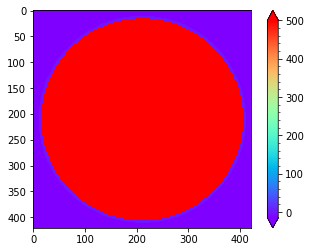

day=1


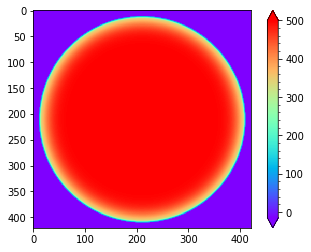

day=2


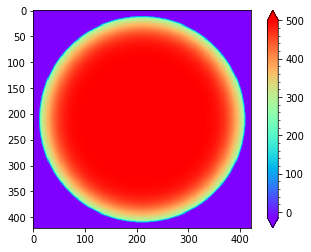

day=3


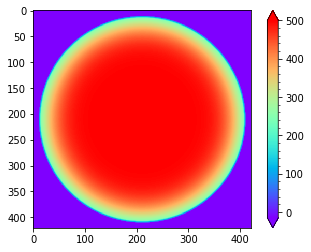

day=4


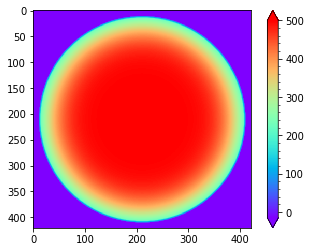

day=5


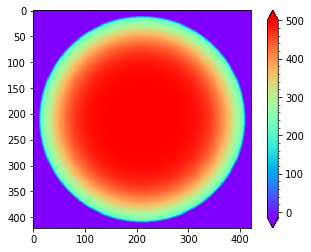

day=6


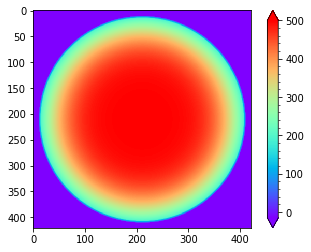

day=7


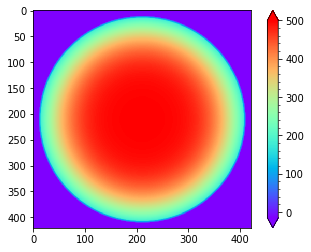

day=8


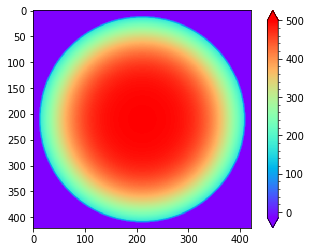

day=9


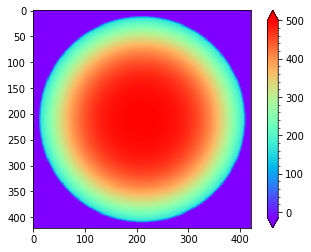

day=10


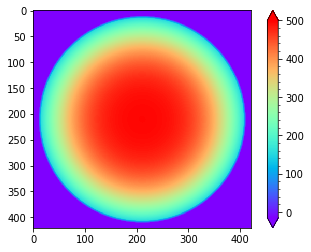

day=11


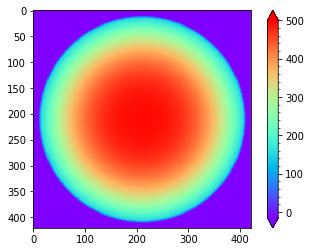

day=12


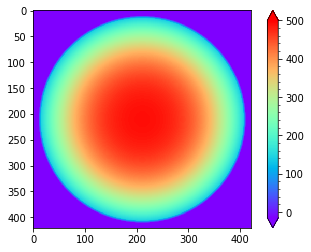

day=13


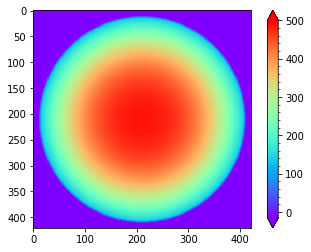

day=14


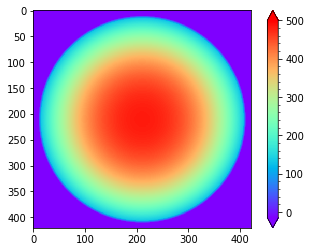

day=15


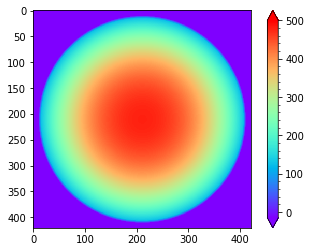

day=16


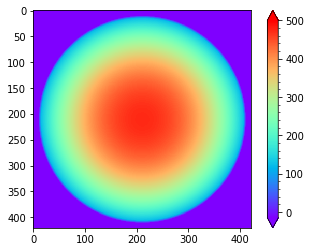

day=17


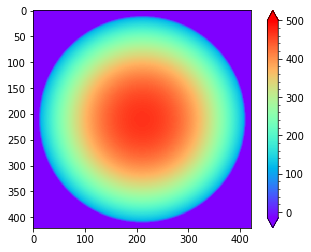

day=18


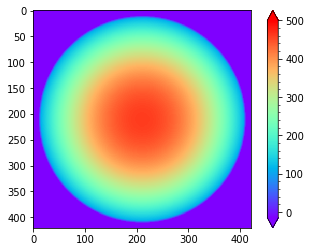

day=19


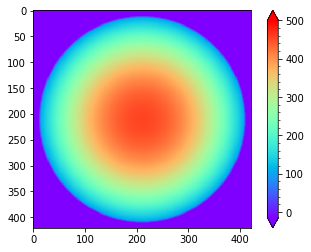

day=20


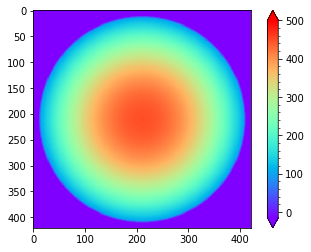

day=21


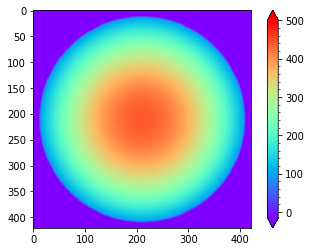

day=22


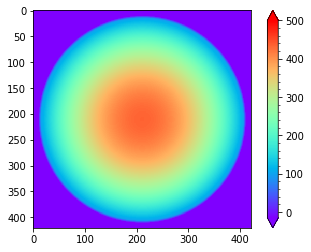

day=23


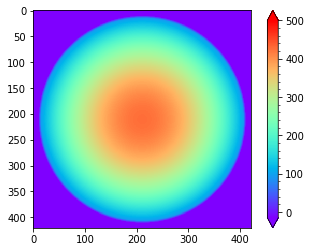

day=24


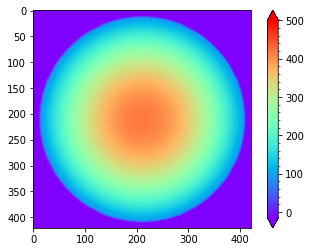

day=25


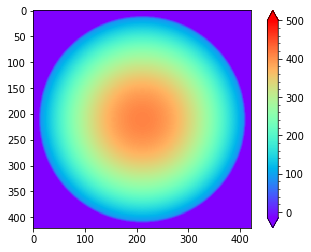

day=26


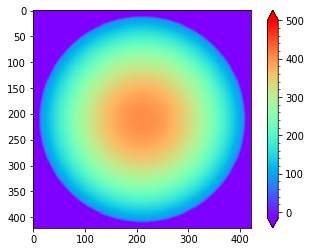

day=27


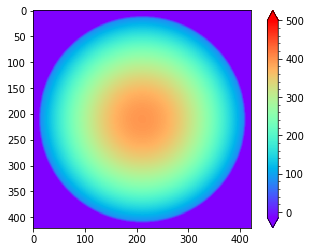

day=28


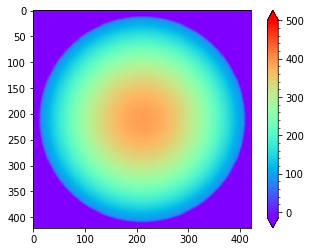

day=29


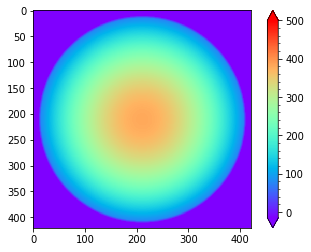

day=30


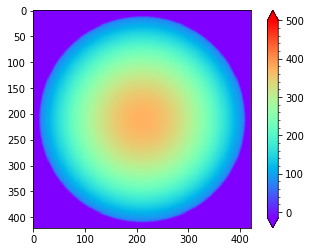

day=31


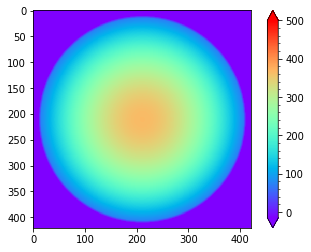

day=32


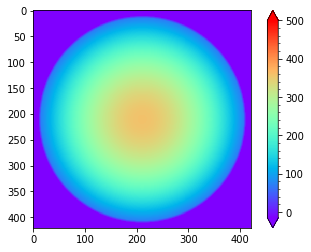

day=33


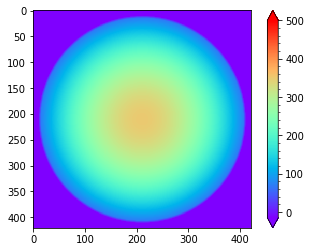

day=34


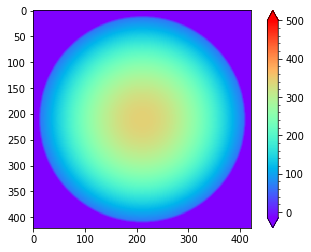

day=35


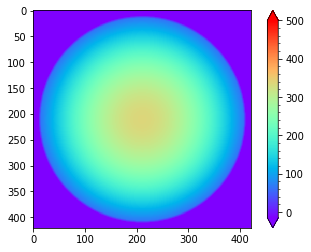

day=36


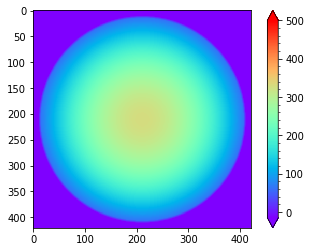

day=37


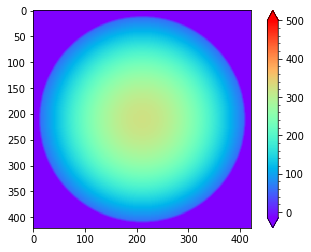

day=38


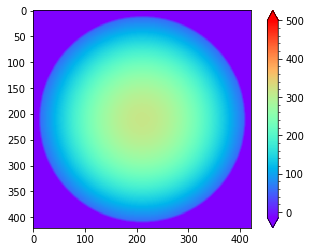

day=39


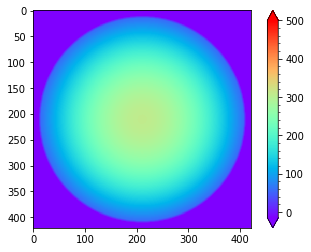

day=40


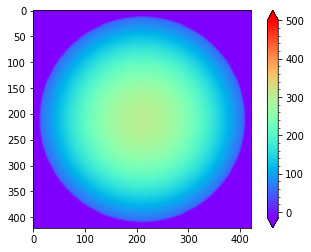

day=41


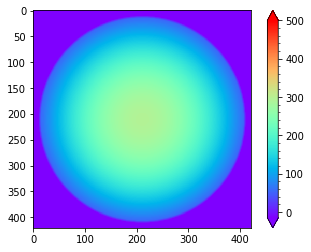

day=42


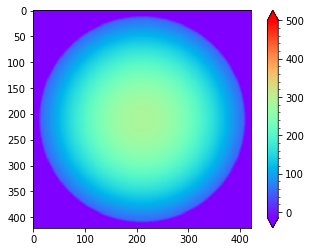

day=43


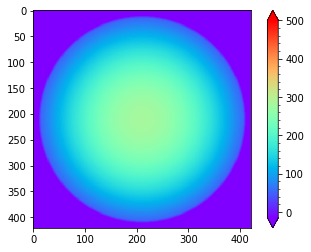

day=44


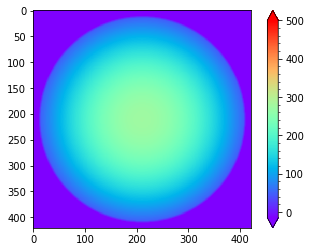

day=45


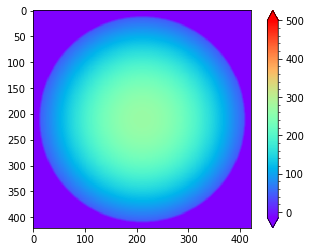

day=46


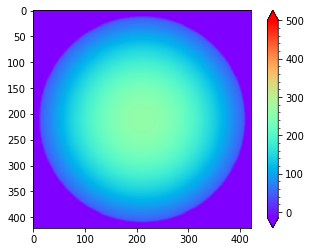

day=47


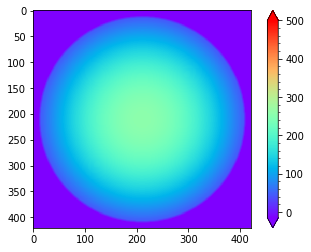

day=48


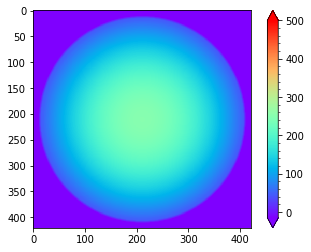

day=49


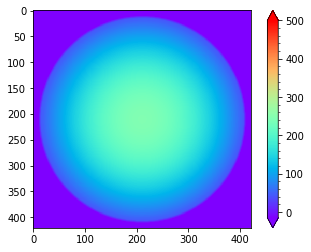

day=50


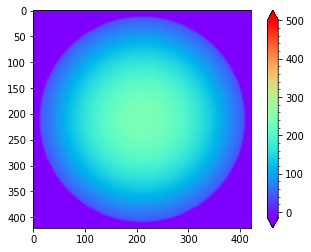

day=51


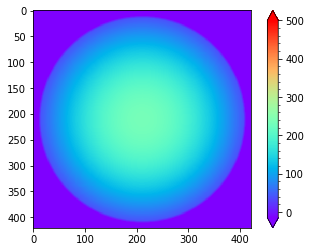

day=52


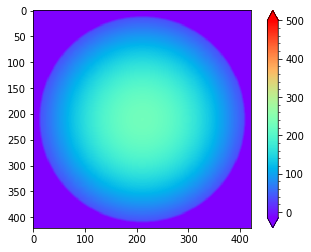

day=53


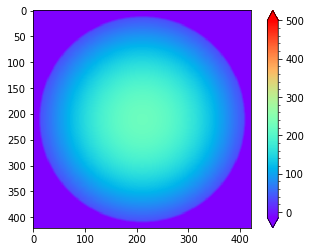

day=54


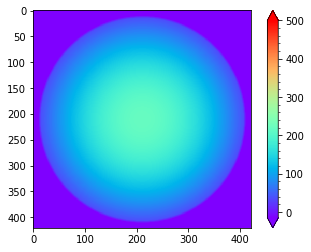

day=55


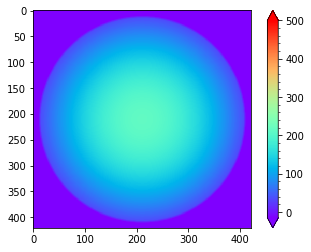

day=56


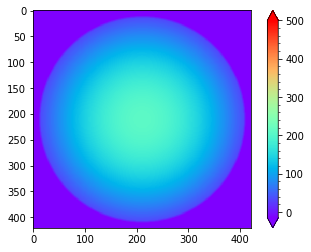

day=57


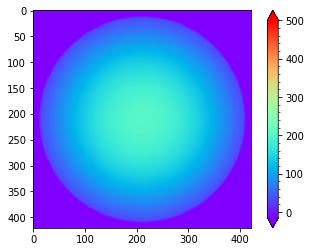

day=58


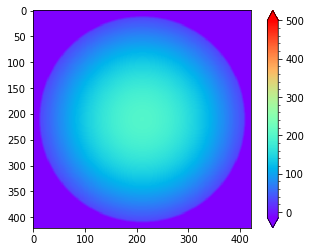

day=59


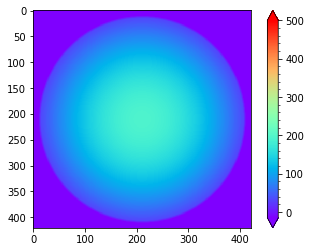

day=60


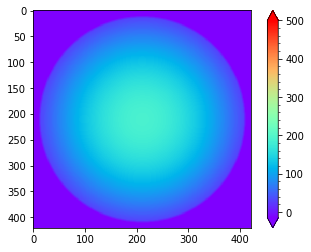

day=61


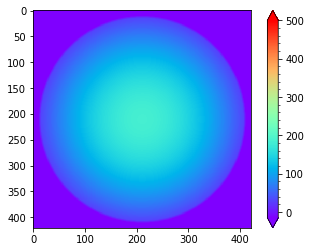

day=62


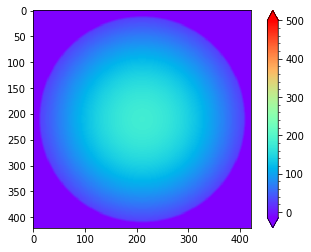

day=63


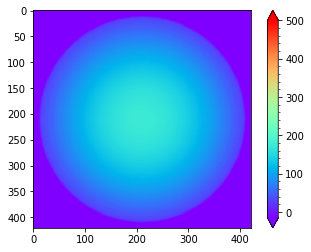

day=64


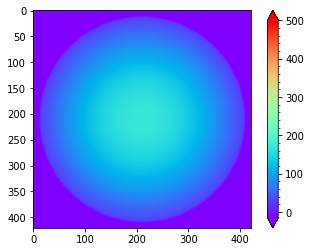

day=65


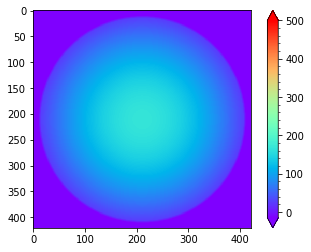

day=66


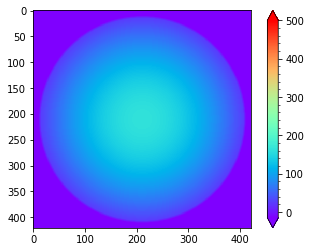

day=67


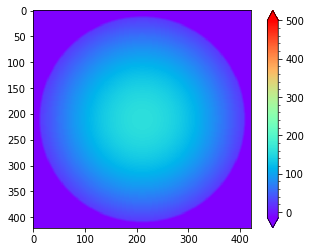

day=68


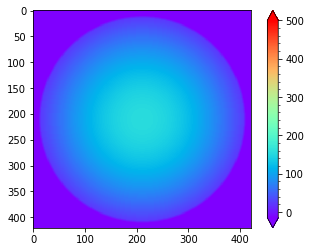

day=69


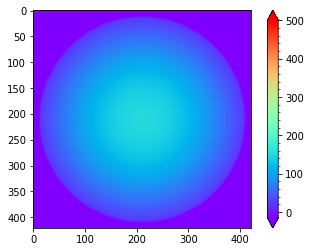

day=70


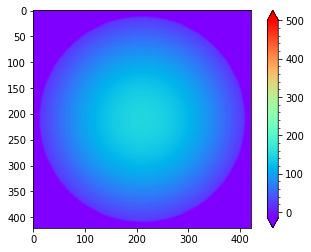

day=71


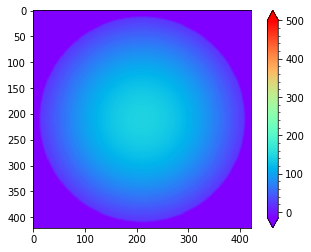

day=72


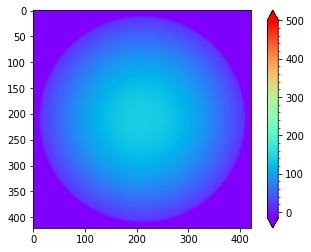

day=73


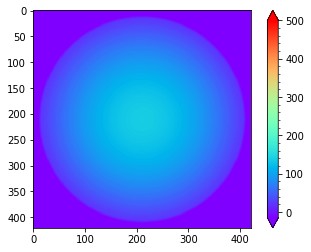

day=74


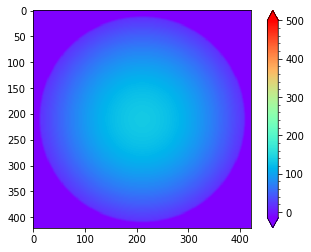

day=75


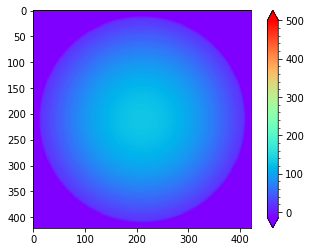

day=76


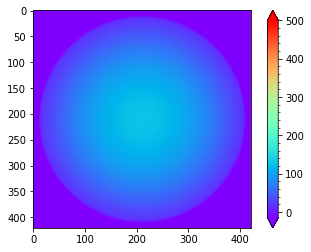

day=77


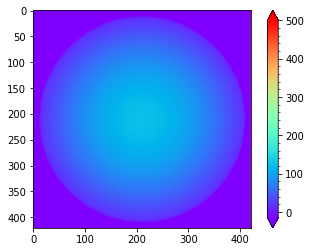

day=78


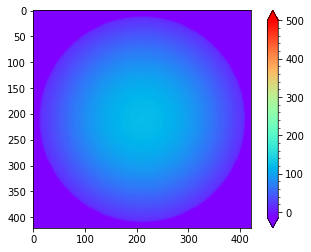

day=79


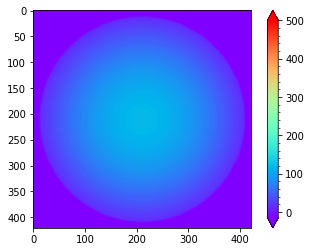

day=80


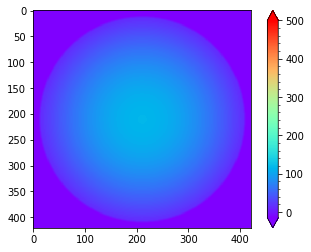

day=81


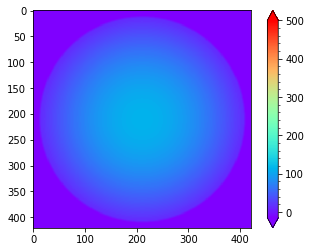

day=82


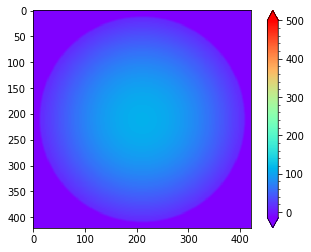

day=83


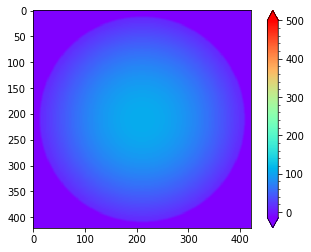

day=84


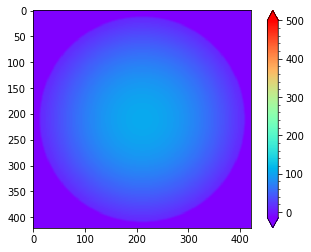

day=85


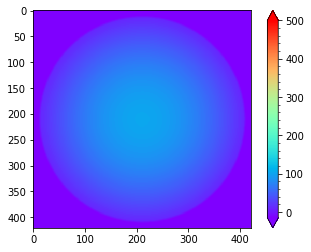

day=86


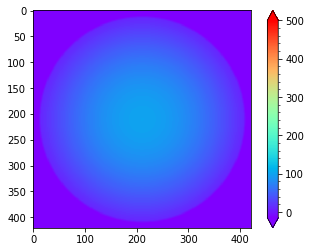

day=87


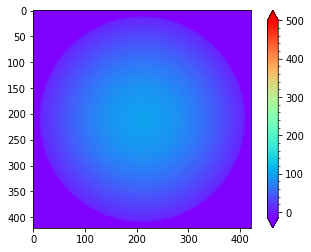

day=88


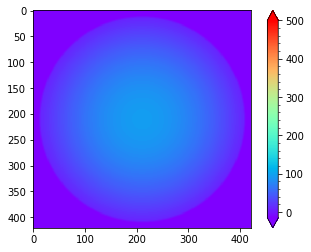

day=89


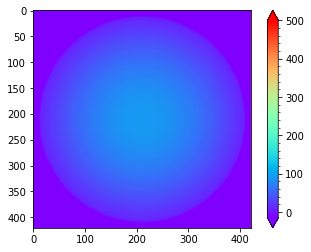

day=90


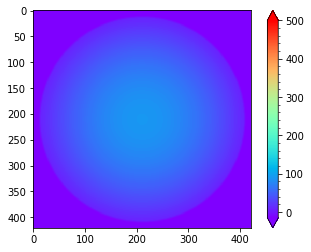

day=91


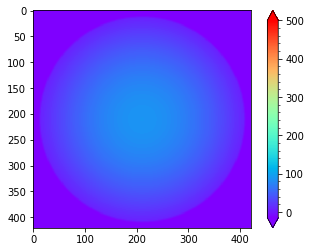

day=92


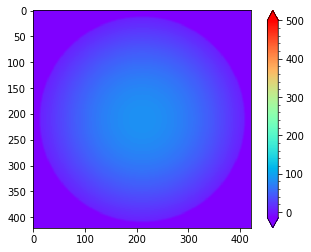

day=93


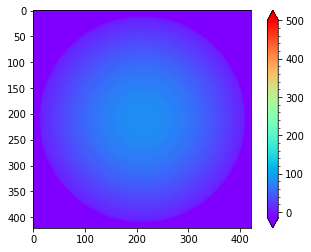

day=94


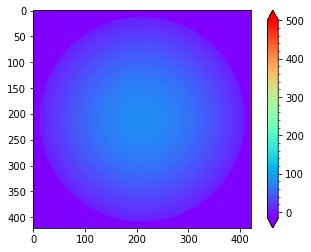

day=95


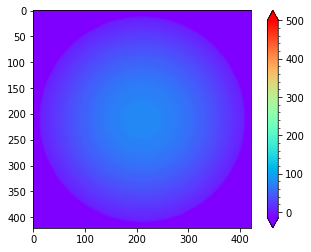

day=96


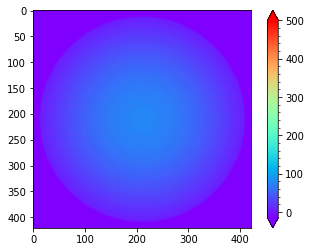

day=97


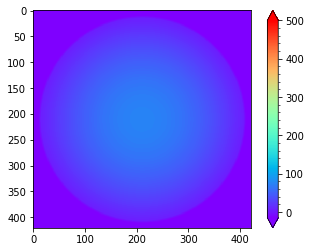

day=98


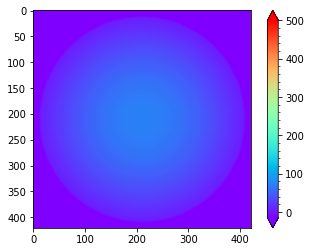

day=99


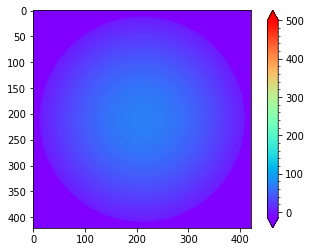

In [13]:
for i in range(0,100,1):
    print(f'day={i}')
    if i!=0:
        tempRound()
    drawTemp()


<IPython.core.display.Javascript object>


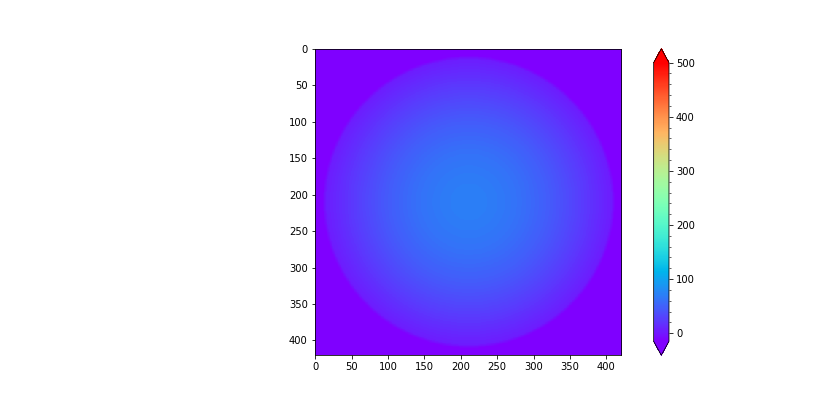

In [17]:
%matplotlib notebook
drawTemp()